In [1]:
%matplotlib inline
import sqlite3
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
indicators = pd.read_csv('world-development-indicators/Indicators.csv')

In [3]:
indicators.isnull().any().any(), indicators.shape

(False, (5656458, 6))

In [4]:
indicators.head(20)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [5]:
# Grouping by Countries and IndicatorCode
df = indicators.groupby(['CountryCode','IndicatorCode']).count()

In [6]:
# New column 'indicatorCounter' to count total of each indicator per country
df['indicatorCounter'] = df.IndicatorName

In [7]:
# checking head of the group
df.head()


CountryName  IndicatorName  Year  Value  \
CountryCode IndicatorCode                                                
ABW         AG.LND.AGRI.K2              53             53    53     53   
            AG.LND.AGRI.ZS              53             53    53     53   
            AG.LND.ARBL.HA              53             53    53     53   
            AG.LND.ARBL.HA.PC           53             53    53     53   
            AG.LND.ARBL.ZS              53             53    53     53   

                               indicatorCounter  
CountryCode IndicatorCode                        
ABW         AG.LND.AGRI.K2                   53  
            AG.LND.AGRI.ZS                   53  
            AG.LND.ARBL.HA                   53  
            AG.LND.ARBL.HA.PC                53  
            AG.LND.ARBL.ZS                   53

In [8]:
# Filter w/ unique values of IndicatorCode that occur more than 30 times per country
df_indicator_filter = pd.Series(df[df.indicatorCounter >= 50].index.get_level_values(1).to_list())

In [9]:
# Filter w/ unique values of Countries that IndicatorCode occur more than 30 times per country
df_country_filter = pd.Series(['BRA','RUS','CHN','IND','ZAF'])

In [10]:
# Check filters data type
print('*Filters data type*')
print()
print('indicator filter = ', type(df_indicator_filter))
print('country filter =', type(df_country_filter))


*Filters data type*

indicator filter =  <class 'pandas.core.series.Series'>
country filter = <class 'pandas.core.series.Series'>


In [11]:
# Check filters shape
print('*Filters shape*')
print()
print('indicator filter = ',df_indicator_filter.shape)
print('country filter =', df_country_filter.shape)

*Filters shape*

indicator filter =  (27787,)
country filter = (5,)


In [12]:
# Check for NA / NULL values in the filterd
print('*Filters have any NA / NULL?*')
print()
print('indicator filter = ',df_indicator_filter.isnull().any())
print('country filter =',df_country_filter.isnull().any())

*Filters have any NA / NULL?*

indicator filter =  False
country filter = False


In [13]:
# Applying filters to the main dataframe 'indicators'.
# 'indicators_filtered' contain only the countries from df_country_filter - ['BRA','RUS','CHN','IND','ZAF']
# and the IndicatorCode's that appear more than 30 times for each of those country
indicators_filtered = indicators[(indicators.IndicatorCode.isin(df_indicator_filter))
                                 & (indicators.CountryCode.isin(df_country_filter))]

In [14]:
# Check shape of filtered dataframe 'indicators_filtered'
indicators_filtered.shape


(66316, 6)

In [15]:
# Random Sample of 'indicators_filtered'
indicators_filtered.sample(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
3984197,Brazil,BRA,Merchandise imports (current US$),TM.VAL.MRCH.CD.WT,2005,7.762780e+10
4799703,Russian Federation,RUS,Manufactures imports (% of merchandise imports),TM.VAL.MANF.ZS.UN,2009,7.645324e+01
4567714,India,IND,"Manufacturing, value added (constant LCU)",NV.IND.MANF.KN,2008,1.128806e+13
699342,South Africa,ZAF,"Final consumption expenditure, etc. (current US$)",NE.CON.TETC.CD,1975,2.650006e+10
194199,South Africa,ZAF,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1966,0.000000e+00
463253,India,IND,GDP per capita (constant LCU),NY.GDP.PCAP.KN,1972,1.761381e+04
518551,China,CHN,"Household final consumption expenditure, etc. ...",NE.CON.PETC.CN,1973,1.485300e+11
463423,India,IND,"Net bilateral aid flows from DAC donors, Switz...",DC.DAC.CHEL.CD,1972,3.440000e+06
1163532,South Africa,ZAF,Final consumption expenditure (constant 2005 US$),NE.CON.TOTL.KD,1981,1.093606e+11
4163785,Brazil,BRA,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,2006,4.481749e+00


### From now on the 'indicators_filtered' will be the main datafram for further analysis

In [16]:
# Grouping dataset by CountryCode
group = indicators_filtered.groupby('CountryCode', as_index=True)

In [17]:
# Defining each country IndicatorsCode list taht will be used to find IndicatorCodes that are part
# of each country selected at the same time
br = group.get_group('BRA').IndicatorCode.to_list()
rus = group.get_group('RUS').IndicatorCode.to_list()
chn = group.get_group('CHN').IndicatorCode.to_list()
ind = group.get_group('IND').IndicatorCode.to_list()
zaf = group.get_group('ZAF').IndicatorCode.to_list()


In [18]:
# Identifying the indicators that is part off all the countries selected at the same time
indicators_intersections_list =[i for i in br if i in (rus and chn and ind and zaf)]

In [19]:
# Converting the list above into a Pandas Series to be used as a filter for the Dataframe
indicators_intersections_filter = pd.Series(indicators_intersections_list)


In [20]:
# Filtering the dataframe based on the 'intersections_filter' (contain only indicators
# that are true for the countries selected)
indicators_filtered_2 = indicators_filtered[indicators_filtered.IndicatorCode.isin
                                            (indicators_intersections_filter)]


In [21]:
# Checking lenght before and after apply the filter 'indicators_intersections_filter'
len(indicators_filtered), len(indicators_filtered_2)

(66316, 66316)

In [22]:
# Checking total of unique indicators before and after apply the'indicators_intersections_filter'
len(indicators_filtered_2.IndicatorCode.unique()), len(indicators_filtered.IndicatorCode.unique())

(304, 304)

In [23]:
group2 = indicators_filtered_2.groupby('CountryCode', as_index=True)

In [24]:
# Checking the size of each unique indicator per country
for i in df_country_filter:
 print(i,len(group2.get_group(i).IndicatorCode.unique()))

BRA 304
RUS 295
CHN 293
IND 299
ZAF 304


In [25]:
# Created a group for Brazi country from where the unique indicators will be evaluated
br_group = group2.get_group('BRA')


In [26]:
# Unique indicators. Since all the unique indicators are the same on each country,
# the list is representative for each of the five countries
br_group.IndicatorName.unique()

array(['Adolescent fertility rate (births per 1,000 women ages 15-19)',
       'Age dependency ratio (% of working-age population)',
       'Age dependency ratio, old (% of working-age population)',
       'Age dependency ratio, young (% of working-age population)',
       'Agriculture, value added (% of GDP)',
       'Agriculture, value added (current LCU)',
       'Agriculture, value added (current US$)',
       'Arms exports (SIPRI trend indicator values)',
       'Arms imports (SIPRI trend indicator values)',
       'Birth rate, crude (per 1,000 people)',
       'CO2 emissions (kg per 2005 US$ of GDP)', 'CO2 emissions (kt)',
       'CO2 emissions (metric tons per capita)',
       'CO2 emissions from gaseous fuel consumption (% of total)',
       'CO2 emissions from gaseous fuel consumption (kt)',
       'CO2 emissions from liquid fuel consumption (% of total)',
       'CO2 emissions from liquid fuel consumption (kt)',
       'CO2 emissions from solid fuel consumption (% of total)',

In [27]:
# Creating a pandas series with the indicators selected that will be used as a filter on
# the 'indicators_filtered_2' dataframe
indicators_selected = pd.Series(['GDP per capita (current US$)',
                                 'Manufacturing, value added (current US$)',
                                 'Manufactures exports (% of merchandise exports)'])

In [28]:
# Checking the 'indicators_selected'
indicators_selected.head()

0                       GDP per capita (current US$)
1           Manufacturing, value added (current US$)
2    Manufactures exports (% of merchandise exports)
dtype: object

In [29]:
# Creating a new dataframe 'indicators_filtered_3' using the 'indicators_selected'
# previously as filter parameter
indicators_filtered_3 = indicators_filtered_2[indicators_filtered_2.IndicatorName.isin
                                             (indicators_selected)]

In [30]:
# Mean of GDP per capita (current US$), per year
GDP_Total = indicators[(indicators.IndicatorName == indicators_selected[0]) & (indicators.Year >= 1962)]
GDP_mean = GDP_Total[['Year','Value']].groupby('Year').mean()

# Mean of Manufacturing, value added (current US$), per year
MAN_Total = indicators[(indicators.IndicatorName == indicators_selected[1]) & (indicators.Year >= 1962)]
MAN_mean = MAN_Total[['Year','Value']].groupby('Year').mean()

# Mean of Manufactures exports (% of merchandise exports)
MAN_EXP_Total = indicators[indicators.IndicatorName == indicators_selected[2]]
MAN_EXP_mean = MAN_EXP_Total[['Year','Value']].groupby('Year').mean()

In [31]:
print('GPD_mean x MAN_mean correlation =', GDP_mean.Value.corr(MAN_mean.Value))
print()
print('GPD_mean x MAN_EXP_mean correlation =', GDP_mean.Value.corr(MAN_EXP_mean.Value))
print()
print('MAN_mean x MAN_EXP_mean correlation =', MAN_mean.Value.corr(MAN_EXP_mean.Value))

GPD_mean x MAN_mean correlation = 0.96006205993739

GPD_mean x MAN_EXP_mean correlation = 0.7742551586712587

MAN_mean x MAN_EXP_mean correlation = 0.6941721124537815


<bound method Figure.show of <Figure size 1296x360 with 3 Axes>>

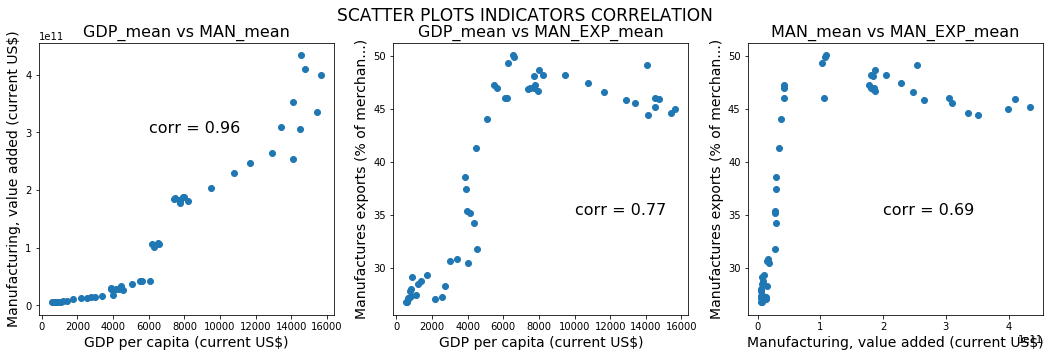

In [32]:
# Scatter plot of GPD_mean and MAN_mean
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=False ,sharey=False, figsize=(18,5))
fig.suptitle('SCATTER PLOTS INDICATORS CORRELATION', fontsize=17)                                 
ax1.scatter(GDP_mean, MAN_mean)
ax1.set_xlabel(indicators_selected[0], fontsize=14)
ax1.set_ylabel(indicators_selected[1], fontsize=14)
ax1.set_title('GDP_mean vs MAN_mean', fontsize=16)
ax1.text(6000,300000000000, 'corr = 0.96', fontsize=16)
ax2.scatter(GDP_mean, MAN_EXP_mean)
ax2.set_xlabel(indicators_selected[0], fontsize=14)
ax2.set_ylabel('Manufactures exports (% of merchan...)', fontsize=14)
ax2.set_title('GDP_mean vs MAN_EXP_mean', fontsize=16)
ax2.text(10000,35, 'corr = 0.77', fontsize=16)
ax3.scatter(MAN_mean, MAN_EXP_mean)
ax3.set_xlabel(indicators_selected[1], fontsize=14)
ax3.set_ylabel('Manufactures exports (% of merchan...)', fontsize=14)
ax3.set_title('MAN_mean vs MAN_EXP_mean', fontsize=16)
ax3.text(200000000000,35, 'corr = 0.69', fontsize=16)
fig.show

In [33]:
# BRA GPD Gross fixed capital formation (current US$) NE.GDI.FTOT.CD
br_GDP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('BRA'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[0])]
# BRA Manufacturing, value added (current US$) NV.IND.MANF.CD
br_MAN = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('BRA'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[1])]
# BRA Manufactures exports (% of merchandise exports) TX.VAL.MANF.ZS.UN
br_MAN_EXP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('BRA'))
                                   & (indicators_filtered_3.IndicatorName == indicators_selected[2])]

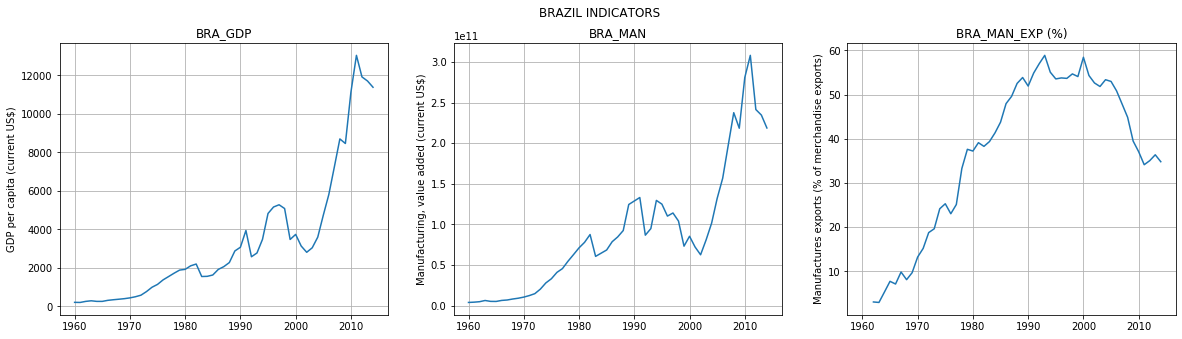

In [34]:
# BRA Indicators Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True ,sharey=False, figsize=(20,5))
fig.suptitle('BRAZIL INDICATORS')
ax1.plot(br_GDP.Year.values, br_GDP.Value.values)
ax1.set_ylabel(br_GDP.IndicatorName.iloc[0])
ax1.set_title('BRA_GDP')
ax1.grid(True)    
ax2.plot(br_MAN.Year.values, br_MAN.Value.values)
ax2.set_ylabel(br_MAN.IndicatorName.iloc[0])
ax2.set_title('BRA_MAN')
ax2.grid(True)      
ax3.plot(br_MAN_EXP.Year.values, br_MAN_EXP.Value.values)
ax3.set_ylabel(br_MAN_EXP.IndicatorName.iloc[0])
ax3.set_title('BRA_MAN_EXP (%)')
ax3.grid(True)

In [35]:
# CHN GPD Gross fixed capital formation (current US$) NE.GDI.FTOT.CD
chn_GDP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('CHN'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[0])]
# CHN Manufacturing, value added (current US$) NV.IND.MANF.CD
chn_MAN = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('CHN'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[1])]
# CHN Manufactures exports (% of merchandise exports) TX.VAL.MANF.ZS.UN
chn_MAN_EXP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('CHN'))
                                   & (indicators_filtered_3.IndicatorName == indicators_selected[2])]

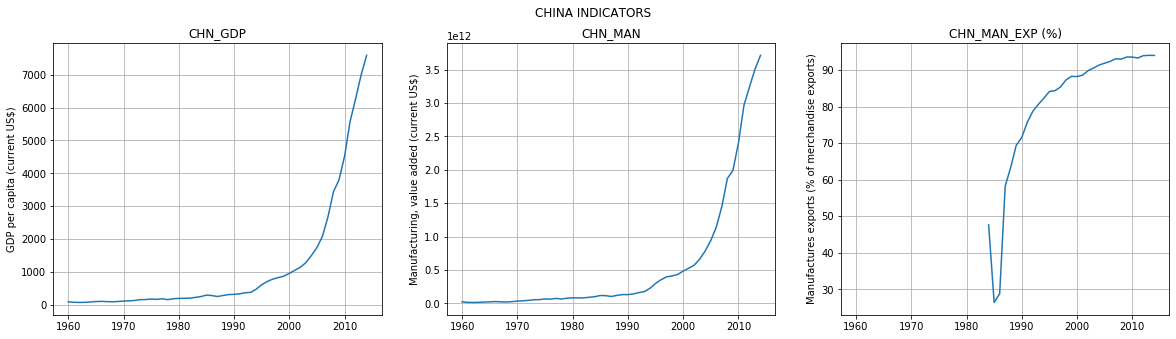

In [36]:
# CHN Indicators Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True ,sharey=False, figsize=(20,5))
fig.suptitle('CHINA INDICATORS')
ax1.plot(chn_GDP.Year.values, chn_GDP.Value.values)
ax1.set_ylabel(chn_GDP.IndicatorName.iloc[0])
ax1.set_title('CHN_GDP')
ax1.grid(True)  
ax2.plot(chn_MAN.Year.values, chn_MAN.Value.values)
ax2.set_ylabel(chn_MAN.IndicatorName.iloc[0])
ax2.set_title('CHN_MAN')
ax2.grid(True)      
ax3.plot(chn_MAN_EXP.Year.values, chn_MAN_EXP.Value.values)
ax3.set_ylabel(chn_MAN_EXP.IndicatorName.iloc[0])
ax3.set_title('CHN_MAN_EXP (%)')
ax3.grid(True)

In [37]:
# RUS GPD Gross fixed capital formation (current US$) NE.GDI.FTOT.CD
rus_GDP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('RUS'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[0])]
# RUS Manufacturing, value added (current US$) NV.IND.MANF.CD
rus_MAN = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('RUS'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[1])]
# RUS Manufactures exports (% of merchandise exports) TX.VAL.MANF.ZS.UN
rus_MAN_EXP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('RUS'))
                                   & (indicators_filtered_3.IndicatorName == indicators_selected[2])]

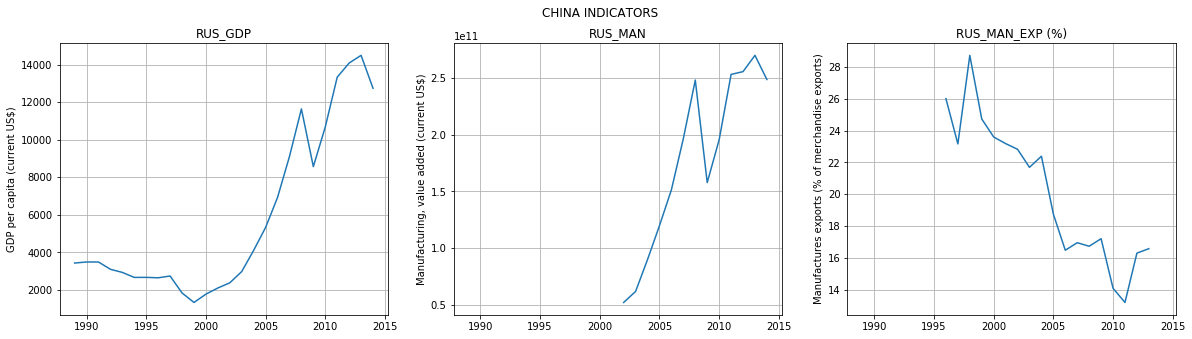

In [38]:
# RUS Indicators Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True ,sharey=False, figsize=(20,5))
fig.suptitle('CHINA INDICATORS')
ax1.plot(rus_GDP.Year.values, rus_GDP.Value.values)
ax1.set_ylabel(rus_GDP.IndicatorName.iloc[0])
ax1.set_title('RUS_GDP')
ax1.grid(True)   
ax2.plot(rus_MAN.Year.values, rus_MAN.Value.values)
ax2.set_ylabel(rus_MAN.IndicatorName.iloc[0])
ax2.set_title('RUS_MAN')
ax2.grid(True)      
ax3.plot(rus_MAN_EXP.Year.values, rus_MAN_EXP.Value.values)
ax3.set_ylabel(rus_MAN_EXP.IndicatorName.iloc[0])
ax3.set_title('RUS_MAN_EXP (%)')
ax3.grid(True)

In [39]:
# IND GPD Gross fixed capital formation (current US$) NE.GDI.FTOT.CD
ind_GDP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('IND'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[0])]
# IND Manufacturing, value added (current US$) NV.IND.MANF.CD
ind_MAN = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('IND'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[1])]
# IND Manufactures exports (% of merchandise exports) TX.VAL.MANF.ZS.UN
ind_MAN_EXP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('IND'))
                                   & (indicators_filtered_3.IndicatorName == indicators_selected[2])]

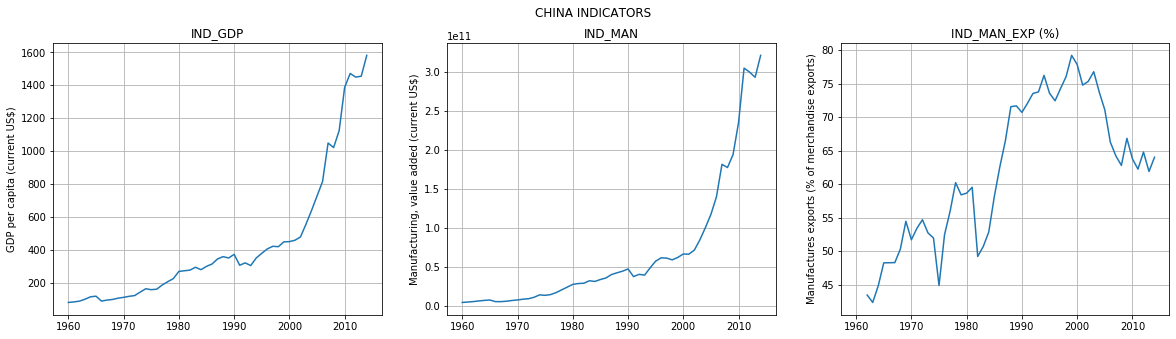

In [40]:
# IND Indicators Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True ,sharey=False, figsize=(20,5))
fig.suptitle('CHINA INDICATORS')
ax1.plot(ind_GDP.Year.values, ind_GDP.Value.values)
ax1.set_ylabel(ind_GDP.IndicatorName.iloc[0])
ax1.set_title('IND_GDP')
ax1.grid(True)   
ax2.plot(ind_MAN.Year.values, ind_MAN.Value.values)
ax2.set_ylabel(ind_MAN.IndicatorName.iloc[0])
ax2.set_title('IND_MAN')
ax2.grid(True)      
ax3.plot(ind_MAN_EXP.Year.values, ind_MAN_EXP.Value.values)
ax3.set_ylabel(ind_MAN_EXP.IndicatorName.iloc[0])
ax3.set_title('IND_MAN_EXP (%)')
ax3.grid(True)

In [41]:
# ZAF GPD Gross fixed capital formation (current US$) NE.GDI.FTOT.CD
zaf_GDP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('ZAF'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[0])]
# ZAF Manufacturing, value added (current US$) NV.IND.MANF.CD
zaf_MAN = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('ZAF'))
                               & (indicators_filtered_3.IndicatorName == indicators_selected[1])]
# ZAF Manufactures exports (% of merchandise exports) TX.VAL.MANF.ZS.UN
zaf_MAN_EXP = indicators_filtered_3[(indicators_filtered_3.CountryCode.str.contains('ZAF'))
                                   & (indicators_filtered_3.IndicatorName == indicators_selected[2])]

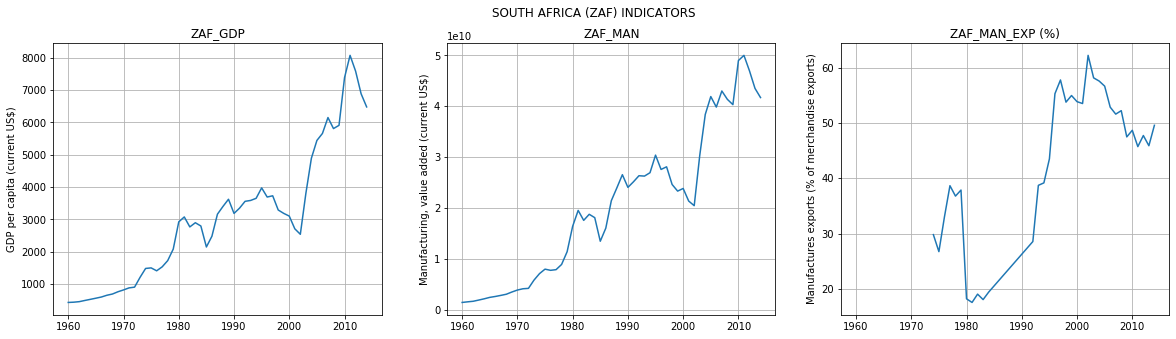

In [42]:
# ZAF Indicators Plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True ,sharey=False, figsize=(20,5))
fig.suptitle('SOUTH AFRICA (ZAF) INDICATORS')
ax1.plot(zaf_GDP.Year.values, zaf_GDP.Value.values)
ax1.set_ylabel(zaf_GDP.IndicatorName.iloc[0])
ax1.set_title('ZAF_GDP')
ax1.grid(True)    
ax2.plot(zaf_MAN.Year.values, zaf_MAN.Value.values)
ax2.set_ylabel(zaf_MAN.IndicatorName.iloc[0])
ax2.set_title('ZAF_MAN')
ax2.grid(True)      
ax3.plot(zaf_MAN_EXP.Year.values, zaf_MAN_EXP.Value.values)
ax3.set_ylabel(zaf_MAN_EXP.IndicatorName.iloc[0])
ax3.set_title('ZAF_MAN_EXP (%)')
ax3.grid(True)

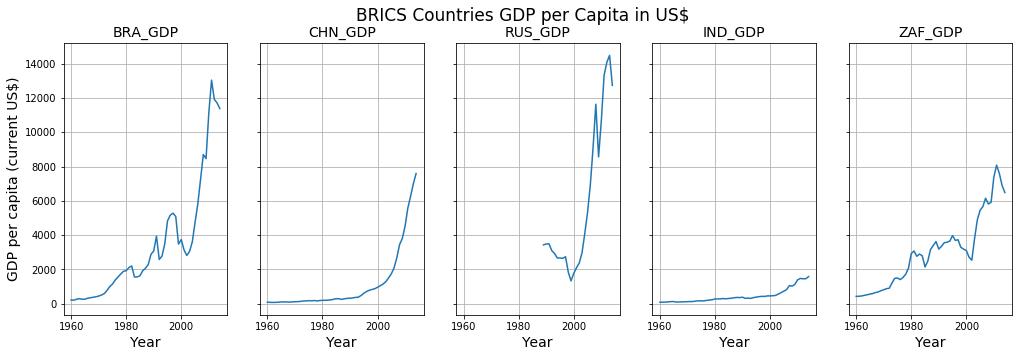

In [43]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharex=True ,sharey=True, figsize=(17,5))
fig.suptitle('BRICS Countries GDP per Capita in US$', fontsize=17)
ax1.plot(br_GDP.Year.values, br_GDP.Value.values)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel(indicators_selected[0], fontsize=14)
ax1.set_title('BRA_GDP', fontsize=14)
ax1.grid(True)
ax2.plot(chn_GDP.Year.values, chn_GDP.Value.values)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_title('CHN_GDP', fontsize=14)
ax2.grid(True)
ax3.plot(rus_GDP.Year.values, rus_GDP.Value.values)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_title('RUS_GDP', fontsize=14)
ax3.grid(True)
ax4.plot(ind_GDP.Year.values, ind_GDP.Value.values)
ax4.set_xlabel('Year', fontsize=14)
ax4.set_title('IND_GDP', fontsize=14)
ax4.grid(True)
ax5.plot(zaf_GDP.Year.values, zaf_GDP.Value.values)
ax5.set_xlabel('Year', fontsize=14)
ax5.set_title('ZAF_GDP', fontsize=14)
ax5.grid(True)

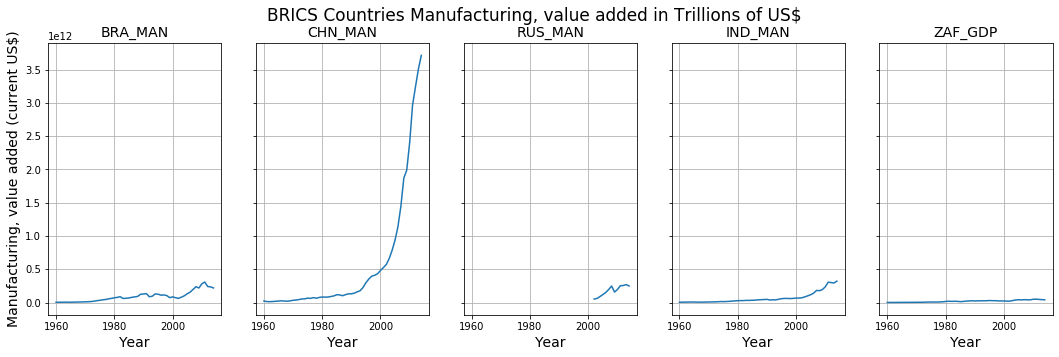

In [44]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharex=True ,sharey=True, figsize=(18,5))
fig.suptitle('BRICS Countries Manufacturing, value added in Trillions of US$', fontsize=17)
ax1.plot(br_MAN.Year.values, br_MAN.Value.values)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel(indicators_selected[1], fontsize=14)
ax1.set_title('BRA_MAN', fontsize=14)
ax1.grid(True)
ax2.plot(chn_MAN.Year.values, chn_MAN.Value.values)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_title('CHN_MAN', fontsize=14)
ax2.grid(True)
ax3.plot(rus_MAN.Year.values, rus_MAN.Value.values)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_title('RUS_MAN', fontsize=14)
ax3.grid(True)
ax4.plot(ind_MAN.Year.values, ind_MAN.Value.values)
ax4.set_xlabel('Year', fontsize=14)
ax4.set_title('IND_MAN', fontsize=14)
ax4.grid(True)
ax5.plot(zaf_MAN.Year.values, zaf_MAN.Value.values)
ax5.set_xlabel('Year', fontsize=14)
ax5.set_title('ZAF_GDP', fontsize=14)
ax5.grid(True)

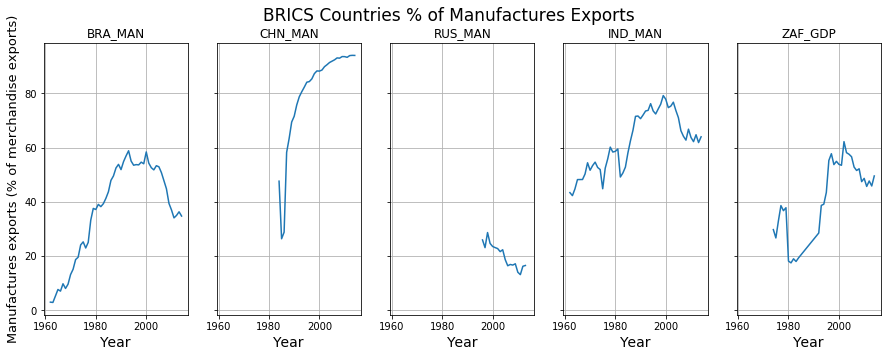

In [45]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharex=True ,sharey=True, figsize=(15,5))
fig.suptitle('BRICS Countries % of Manufactures Exports', fontsize=17)
ax1.plot(br_MAN_EXP.Year.values, br_MAN_EXP.Value.values)
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel(indicators_selected[2], fontsize=13)
ax1.set_title('BRA_MAN')
ax1.grid(True)
ax2.plot(chn_MAN_EXP.Year.values, chn_MAN_EXP.Value.values)
ax2.set_xlabel('Year', fontsize=14)
ax2.set_title('CHN_MAN')
ax2.grid(True)
ax3.plot(rus_MAN_EXP.Year.values, rus_MAN_EXP.Value.values)
ax3.set_xlabel('Year', fontsize=14)
ax3.set_title('RUS_MAN')
ax3.grid(True)
ax4.plot(ind_MAN_EXP.Year.values, ind_MAN_EXP.Value.values)
ax4.set_xlabel('Year', fontsize=14)
ax4.set_title('IND_MAN')
ax4.grid(True)
ax5.plot(zaf_MAN_EXP.Year.values, zaf_MAN_EXP.Value.values)
ax5.set_xlabel('Year', fontsize=14)
ax5.set_title('ZAF_GDP')
ax5.grid(True)